In [1]:
import os
import sys
import time

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from cellpose import utils, io
from cellpose import models
from cellpose.io import imread
from cellpose import plot

In [2]:
img_path = "C:\\Users\\Simon Andersen\\Documents\\Uni\\SummerProject\\data\\valeriias mdck data for simon\\24.08.22_698x648\\merged.tif"

In [3]:
def show_segmentation_mod(fig, img, maski, nsegmentation = 0, channels=[0,0], file_name=None):
    """ plot segmentation results (like on website)
    
    Can save each panel of figure with file_name option. Use channels option if
    img input is not an RGB image with 3 channels.
    
    Parameters
    -------------

    fig: matplotlib.pyplot.figure
        figure in which to make plot

    img: 2D or 3D array
        image input into cellpose

    maski: int, 2D array
        for image k, masks[k] output from Cellpose.eval, where 0=NO masks; 1,2,...=mask labels

    flowi: int, 2D array 
        for image k, flows[k][0] output from Cellpose.eval (RGB of flows)

    channels: list of int (optional, default [0,0])
        channels used to run Cellpose, no need to use if image is RGB

    file_name: str (optional, default None)
        file name of image, if file_name is not None, figure panels are saved
        
    seg_norm: bool (optional, default False)
        improve cell visibility under labels
        

    """

    nrow = nsegmentation + 1
    ax = fig.add_subplot(nrow,4,1)
    img0 = img.copy()

    if img0.shape[0] < 4:
        img0 = np.transpose(img0, (1,2,0))
    if img0.shape[-1] < 3 or img0.ndim < 3:
        img0 = plot.image_to_rgb(img0, channels=channels)
    else:
        if img0.max()<=50.0:
            img0 = np.uint8(np.clip(img0*255, 0, 1))
    ax.imshow(img0)
    ax.set_title('original image')
    ax.axis('off')

    outlines = utils.masks_to_outlines(maski)

    overlay = plot.mask_overlay(img0, maski)

    ax = fig.add_subplot(nrow,4,2)
    outX, outY = np.nonzero(outlines)
    imgout= img0.copy()
    imgout[outX, outY] = np.array([255,0,0]) # pure red

    ax.imshow(imgout)
    ax.set_title('predicted outlines')
    ax.axis('off')

    ax = fig.add_subplot(nrow,4,3)
    ax.imshow(overlay)
    ax.set_title('predicted masks')
    ax.axis('off')

    if file_name is not None:
        save_path = os.path.splitext(file_name)[0]
        io.imsave(save_path + '_overlay.jpg', overlay)
        io.imsave(save_path + '_outlines.jpg', imgout)


In [113]:
diam_model = models.Cellpose(gpu=True, model_type='cyto2')

In [62]:
img_list = [img for img in imread(img_path)]

100%|██████████| 11/11 [00:00<00:00, 955.88it/s]


In [70]:
len(imgs)

3

In [69]:
idx = [0, 2, 7, 23]
imgs = [img_list[i] for i in idx if i < len(img_list)]


In [114]:

masks, flows, styles, diams = diam_model.eval(imgs, diameter=None, channels=[0,0])

In [23]:
cellpose_folder_path = "C:\\Users\\Simon Andersen\\miniconda3\\envs\\cellpose\\lib\\site-packages\\cellpose"
class_path = 'C:\\Users\\Simon Andersen\\Projects\\Projects\\CellSegmentationTracker\\cellsegmentationtracker'

In [24]:
pretrained_models_paths = [os.path.join(cellpose_folder_path, 'models', 'cyto'), \
                                        os.path.join(cellpose_folder_path, 'models', 'cyto2'),\
                                        os.path.join(cellpose_folder_path, 'models', 'nuclei'), \
                                        os.path.join(class_path, 'models', 'epi500'), \
                                        os.path.join(class_path, 'models', 'epi2500'), \
                                            os.path.join(class_path, 'models', 'epi6000')]

In [34]:
pretrained_models_paths[0]

'C:\\Users\\Simon Andersen\\miniconda3\\envs\\cellpose\\lib\\site-packages\\cellpose\\models\\cyto'

In [45]:
flow_threshold = 0.4
cellprob_threshold = 0.0
cp_model = 'cyto2'
use_model = 'CYTO2'
model_path = pretrained_models_paths[-2] if not use_model in ['CYTO', 'CYTO2', 'NUCELI'] else None

In [77]:
cp_kwargs = dict(gpu=True, pretrained_model=model_path, model_type=cp_model, net_avg=False, diam_mean=0.1, device=None, residual_on=True, style_on=True, concatenation=False, nchan=2)

In [78]:
model = models.CellposeModel(**cp_kwargs)

In [73]:
model = models.CellposeModel(gpu=True, pretrained_model=model_path, model_type=cp_model, net_avg=False, diam_mean=30, device=None, residual_on=True, style_on=True, concatenation=False, nchan=2)

In [48]:
size_model_path = models.size_model_path(model_type=cp_model)

In [49]:
size_model = models.SizeModel(cp_model=model, pretrained_size=size_model_path)

In [83]:
b = diam[0] if isinstance(diam, np.ndarray) else diam

In [86]:
diam[0]

29.68302149304772

In [85]:
diam = np.array([diam]) if isinstance(diam, float) else diam


In [75]:
diam, diam2

(29.68302149304772, 31.533600104197582)

In [74]:
diam, diam2 = size_model.eval(imgs[0], channels=[0,0]) #, channels=[0,0])

In [88]:
save_path 

'C:\\Users\\Simon Andersen\\Documents\\Uni\\SummerProject\\data\\valeriias mdck data for simon\\24.08.22_698x648\\merged'

STARTING SEGMENTATION OF IMAGE  0
MODEL:  <cellpose.models.CellposeModel object at 0x00000237028347F0>
PARAMETERS: 
diameter =  [29.68302149]
flow_threshold =  0.4
cellprob_threshold =  0.0
SEGMENTATION COMPLETETD IN :  5.4  SECONDS


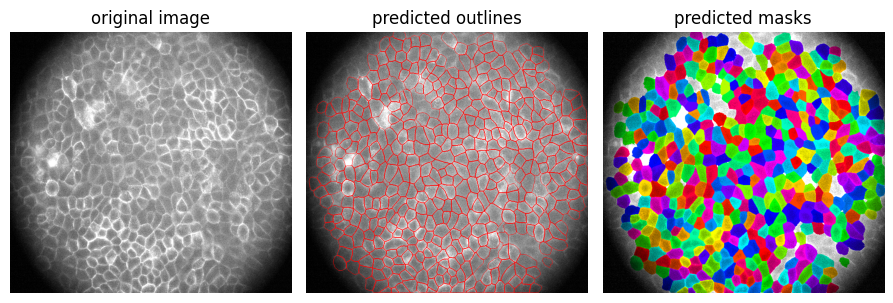

STARTING SEGMENTATION OF IMAGE  1
MODEL:  <cellpose.models.CellposeModel object at 0x00000237028347F0>
PARAMETERS: 
diameter =  [29.68302149]
flow_threshold =  0.4
cellprob_threshold =  0.0


IndexError: index 1 is out of bounds for axis 0 with size 1

In [91]:
for i, im in enumerate(imgs):
    
    print("STARTING SEGMENTATION OF IMAGE ", i)
    print("MODEL: ", model)
    print("PARAMETERS: ",)
    print("diameter = ", diam)
    print("flow_threshold = ", flow_threshold)
    print("cellprob_threshold = ", cellprob_threshold)
    print("===============================================")

    t1 = time.time()
    masks, flows, styles = model.eval(im, diameter=diam[i], cellprob_threshold = cellprob_threshold, flow_threshold = flow_threshold, channels=[0,0])
    t2 = time.time()
    
    print("SEGMENTATION COMPLETETD IN : ", np.round(t2-t1,1), " SECONDS")
    print("===============================================")

    fig = plt.figure(figsize=(12,5))
    show_segmentation_mod(fig, im, masks, channels=[0,0])

    # save segmentation
    save_path = os.path.splitext(img_path)[0] + f'_seg_img{i}_diam{np.round(diam[i],3)}_flow{flow_threshold}_cellprob{cellprob_threshold}.png'
    plt.savefig(save_path, dpi=420, bbox_inches='tight')

    plt.tight_layout()
    plt.show()

STARTING SEGMENTATION OF IMAGE  0
MODEL:  cyto
PARAMETERS: 
diameter =  32.03484154879717
flow_threshold =  0.4
cellprob_threshold =  0.0
SEGMENTATION COMPLETETD IN :  5.8  SECONDS


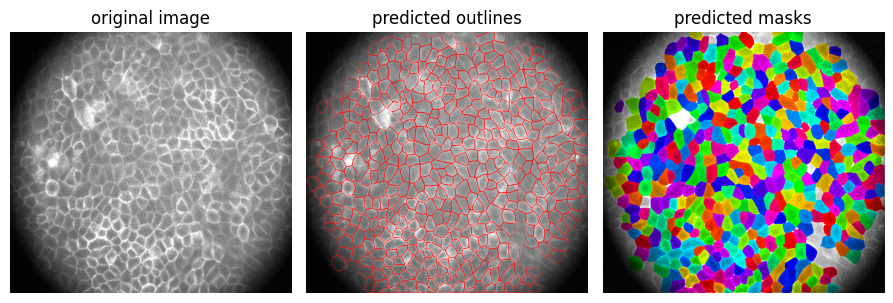

STARTING SEGMENTATION OF IMAGE  1
MODEL:  cyto
PARAMETERS: 
diameter =  32.03484154879717
flow_threshold =  0.4
cellprob_threshold =  0.0
SEGMENTATION COMPLETETD IN :  5.6  SECONDS


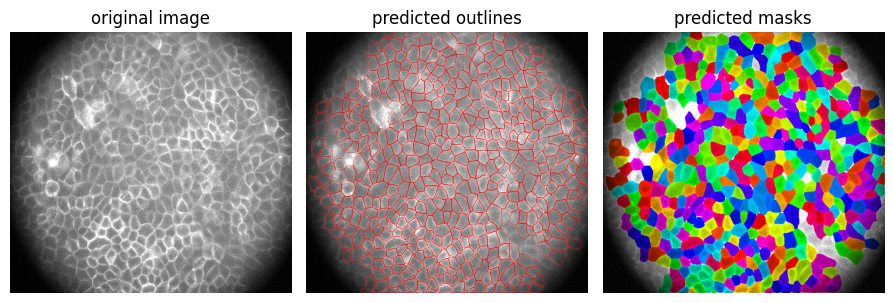

STARTING SEGMENTATION OF IMAGE  2
MODEL:  cyto
PARAMETERS: 
diameter =  32.03484154879717
flow_threshold =  0.4
cellprob_threshold =  0.0
SEGMENTATION COMPLETETD IN :  5.4  SECONDS


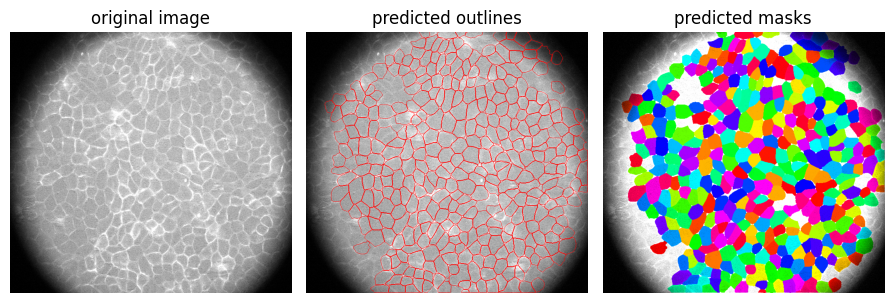

In [86]:
for i, im in enumerate(imgs):
    
    print("STARTING SEGMENTATION OF IMAGE ", i)
    print("MODEL: ", model)
    print("PARAMETERS: ",)
    print("diameter = ", diams)
    print("flow_threshold = ", flow_threshold)
    print("cellprob_threshold = ", cellprob_threshold)
    print("===============================================")

    t1 = time.time()
    masks, flows, styles, diams = diam_model.eval(im, diameter=diams, cellprob_threshold = cellprob_threshold, flow_threshold = flow_threshold, channels=[0,0])
    t2 = time.time()
    
    print("SEGMENTATION COMPLETETD IN : ", np.round(t2-t1,1), " SECONDS")
    print("===============================================")

    fig = plt.figure(figsize=(12,5))
    show_segmentation_mod(fig, im, masks, channels=[0,0])

    plt.tight_layout()
    plt.show()


In [39]:
diams

29.597108081327676

In [93]:
model = models.CellposeModel(gpu=True, pretrained_model=False, model_type='cyto2', net_avg=False, diam_mean=diams, device=None, residual_on=True, style_on=True, concatenation=False, nchan=2)

In [51]:
masks, flows, styles, = model.eval(imgs, diameter=None, channels=[0,0])

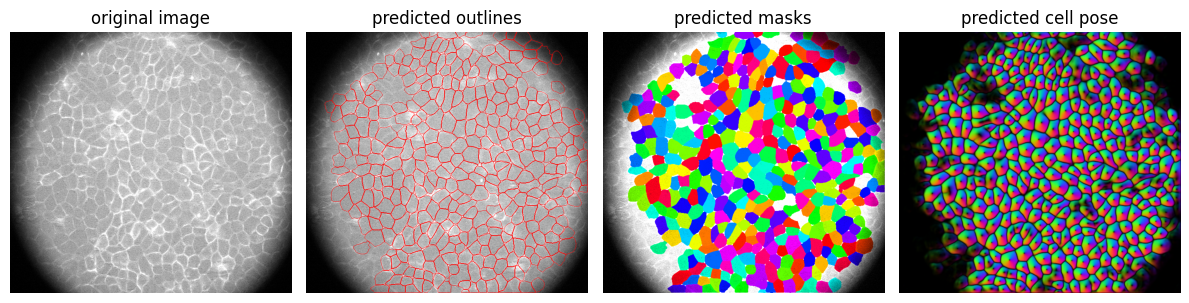

In [79]:
fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, imgs[-1], masks, flows[0], channels=[0,0])
plt.tight_layout()
plt.show()